In [16]:
import asyncio
import pandas as pd
from prisma import Prisma
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


In [2]:
db = Prisma()

In [4]:

await db.connect()
rows = await db.weather_db.find_many(order={'timestamp': 'asc'})
await db.disconnect()

In [6]:
df = pd.DataFrame([r.model_dump() for r in rows])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,id,timestamp,temperature,humidity
0,ab84a598-c9f4-4e24-836f-adb128734b7b,2025-10-08 07:02:30.495000+00:00,27.8,61.2
1,8eb2d44f-dfb8-498d-8991-4d1fd418400f,2025-10-08 07:27:15.118000+00:00,29.3,78.0
2,b1c4459e-4d56-4818-b4d5-8a5becfc62f6,2025-10-08 07:30:12.261000+00:00,29.3,78.0
3,d151f1fa-11af-45dc-9388-de9ddc1347cd,2025-10-08 07:34:05.558000+00:00,29.3,78.0
4,ba6ffda6-425d-4608-9fde-67031511e62f,2025-10-08 07:36:59.299000+00:00,29.3,78.0


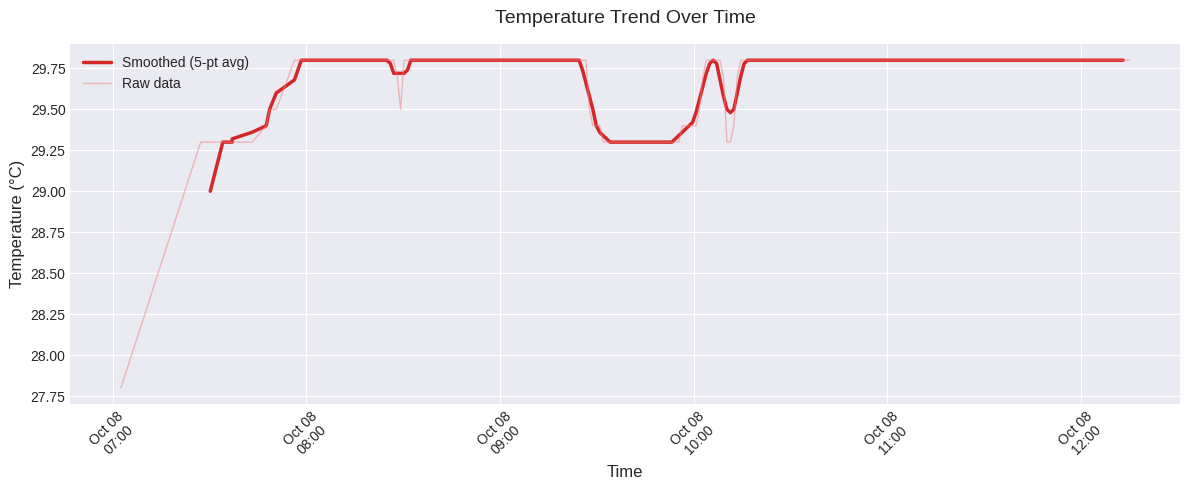

In [15]:


df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')


df['temp_smooth'] = df['temperature'].rolling(window=5, center=True).mean()


plt.style.use('seaborn-v0_8-darkgrid')   # modern soft theme
fig, ax = plt.subplots(figsize=(12, 5))


ax.plot(df['timestamp'], df['temp_smooth'],
        color='tab:red', linewidth=2.5, label='Smoothed (5-pt avg)')
ax.plot(df['timestamp'], df['temperature'],
        color='lightcoral', alpha=0.5, linewidth=1, label='Raw data')


ax.set_title('Temperature Trend Over Time', fontsize=14, pad=15)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n%H:%M'))


plt.xticks(rotation=45)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()
